### Checking Chrome Driver

In [1]:
## installing Chrome Driver
from webdriver_manager.chrome import ChromeDriverManager
ChromeDriverManager().install();

## Importing Universal Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm 
import numpy as np

## Reading Dataset

In [3]:
df = pd.read_csv('data/task2.csv')

## Showing Information around the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         13972 non-null  int64 
 1   Experience_Level  13972 non-null  object
 2   Employment_Type   13972 non-null  object
 3   Job_Title         13972 non-null  object
 4   Salary            13972 non-null  int64 
 5   Salary_Currency   13972 non-null  object
 6   Remote_Ratio      13972 non-null  int64 
 7   Company_Size      13972 non-null  object
dtypes: int64(3), object(5)
memory usage: 873.4+ KB


## Cleansing Dataset of Duplicates and NANs

In [5]:
cleansed_df = df.drop_duplicates()
cleansed_df = cleansed_df.dropna()

In [6]:
cleansed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8407 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         8407 non-null   int64 
 1   Experience_Level  8407 non-null   object
 2   Employment_Type   8407 non-null   object
 3   Job_Title         8407 non-null   object
 4   Salary            8407 non-null   int64 
 5   Salary_Currency   8407 non-null   object
 6   Remote_Ratio      8407 non-null   int64 
 7   Company_Size      8407 non-null   object
dtypes: int64(3), object(5)
memory usage: 591.1+ KB


## Extracting All Currencies in the Dataset

In [7]:
value_counts = cleansed_df.groupby('Salary_Currency').size()
value_counts = value_counts.reset_index()
value_counts.columns = ['Salary_Currency', 'Count']
value_counts

,Salary_Currency,Count
0,AUD,12
1,BRL,4
2,CAD,48
3,CHF,6
4,CLP,1
5,DKK,3
6,EUR,339
7,GBP,410
8,HKD,1
9,HUF,3


## Dropping Entries with Minor Currencies

In [8]:
filter_indexes = cleansed_df['Salary_Currency'].isin(value_counts[value_counts['Count'] >= 10]['Salary_Currency'])
filtered_df = cleansed_df[filter_indexes]
filtered_df

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium
...,...,...,...,...,...,...,...,...
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large


In [9]:
filtered_df['Salary_Currency'].value_counts()

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
Name: count, dtype: int64

## Adding a Column to the Dataset Regarding Salaries in USD

In [10]:
from task2.currency import find_exchange_rate

exchange_rates = {}
for currency in filtered_df['Salary_Currency'].unique():
    exchange_rates[currency] = find_exchange_rate(currency)

In [11]:
exchange_rates

{'USD': 1, 'EUR': 1.08, 'GBP': 1.26, 'CAD': 0.74, 'AUD': 0.66, 'INR': 0.012}

In [12]:
filtered_df.loc[:, "Salary_in_USD"] = filtered_df.apply(
    lambda entry: exchange_rates[entry['Salary_Currency']] * entry['Salary'], 
    axis=1)
filtered_df[filtered_df['Salary_Currency'] != 'USD']

/tmp/ipykernel_56425/1375363795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, "Salary_in_USD"] = filtered_df.apply(


,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size,Salary_in_USD
29,2024,Entry-Level,Full-Time,Data Analyst,39600,EUR,0,Medium,42768.00
30,2024,Entry-Level,Full-Time,Data Analyst,33600,EUR,0,Medium,36288.00
143,2024,Senior-Level,Full-Time,Data Quality Analyst,80000,GBP,0,Medium,100800.00
144,2024,Senior-Level,Full-Time,Data Quality Analyst,45000,GBP,0,Medium,56700.00
243,2023,Entry-Level,Full-Time,Data DevOps Engineer,44382,EUR,50,Large,47932.56
...,...,...,...,...,...,...,...,...,...
13952,2021,Mid-Level,Full-Time,Lead Data Analyst,1450000,INR,100,Large,17400.00
13956,2021,Mid-Level,Full-Time,Data Engineer,38400,EUR,100,Large,41472.00
13961,2020,Senior-Level,Full-Time,Machine Learning Engineer,40000,EUR,100,S,43200.00
13965,2021,Mid-Level,Full-Time,Data Engineer,24000,EUR,50,Large,25920.00


## Visualizations

In [13]:
finalized_df = filtered_df

In [54]:
def do_histograms(column: str):
    plt.figure()
    plt.title(f'Salary Distribution of Different {column.replace('_', ' ')}s')
    for label, group in finalized_df.groupby(column):
        data = group['Salary_in_USD']
        plt.hist(data, bins=20, alpha=0.5, edgecolor='black', label=label)
        plt.legend()
        plt.xlabel('Salary')
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    for label, group in finalized_df.groupby(column):
        data = group['Salary_in_USD']
        plt.figure()
        plt.hist(data, bins=20, alpha=0.5, edgecolor='black', label=label)
        plt.legend()
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        plt.xlabel('Salary')
        plt.title(f'Salary Distribution of {column.replace('_', ' ')}={label}')
    plt.show()

In [59]:
def do_violin_plots(column: str):
    for label, group in finalized_df.groupby(column):
        data = group['Salary_in_USD']
        plt.figure()
        plt.violinplot(data)
        plt.xlabel('Salary')
        plt.title(f'Salary Distribution of {column.replace('_', ' ')}={label}')
    plt.show()

In [103]:
def do_quantile_plot(column: str, values = None):
    if values is None:
        values = np.sort(finalized_df[column].unique())
    medians = []
    means = []
    first_quantiles = []
    third_quantiles = []
    for value in values:
        data = finalized_df[finalized_df[column] == value]['Salary_in_USD']
        first_quantiles.append(data.quantile(0.25))
        medians.append(data.median())
        third_quantiles.append(data.quantile(0.75))
        means.append(data.mean())
    X = np.arange(len(values))
    plt.plot(X, first_quantiles, label='1st quantile')
    plt.plot(X, medians, label='median')
    plt.plot(X, third_quantiles, label='3rd quantile')
    plt.plot(X, means, label='mean')
    plt.xticks(X, values)
    plt.xlabel(column)
    plt.legend()
    plt.show()
    

### Histogram of All Salaries

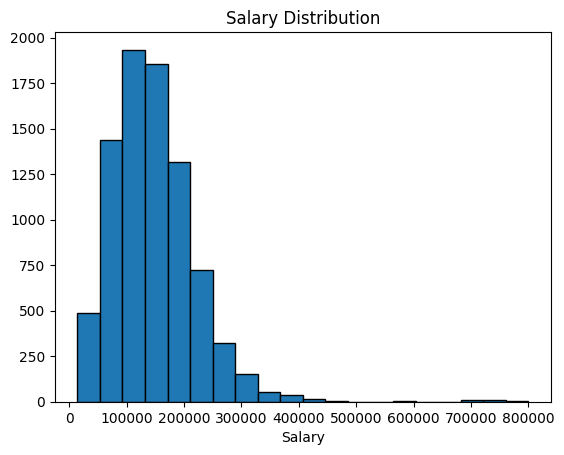

In [23]:
plt.figure()
finalized_df['Salary_in_USD'].hist(bins=20, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.grid(False)
plt.show()

### Analysis of Experience Level

#### Histograms

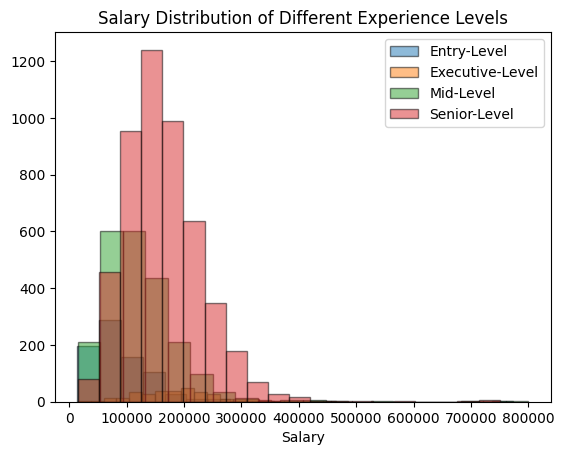

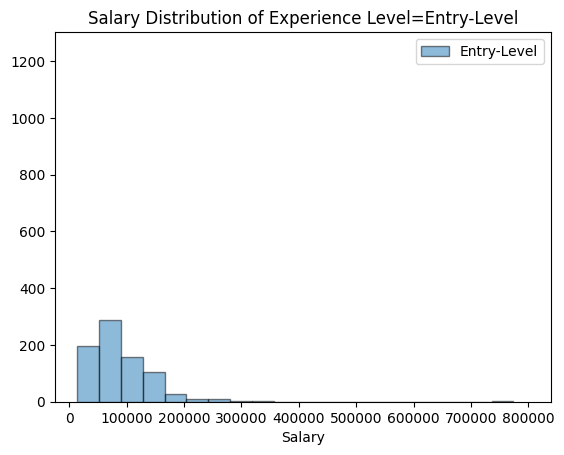

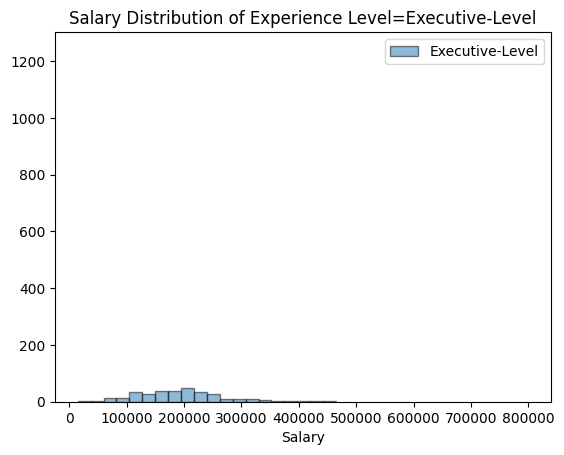

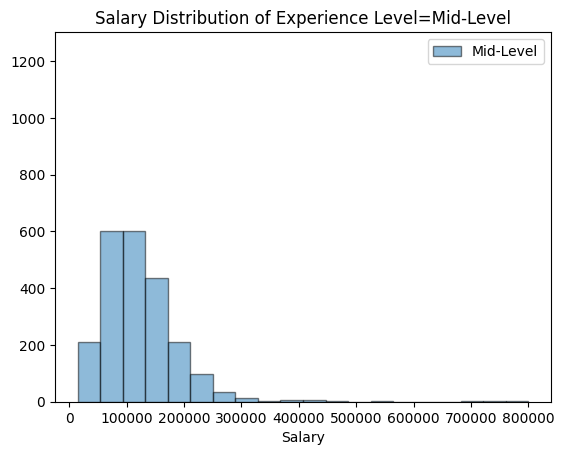

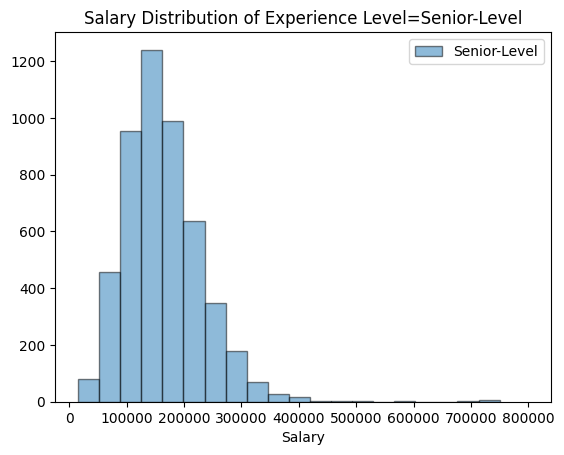

In [56]:
do_histograms('Experience_Level')

#### Violin Plots

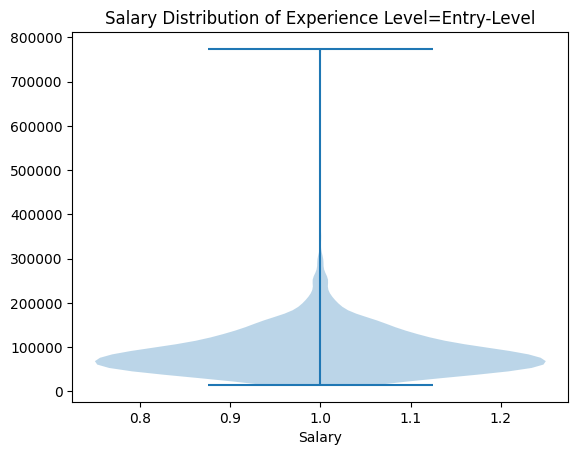

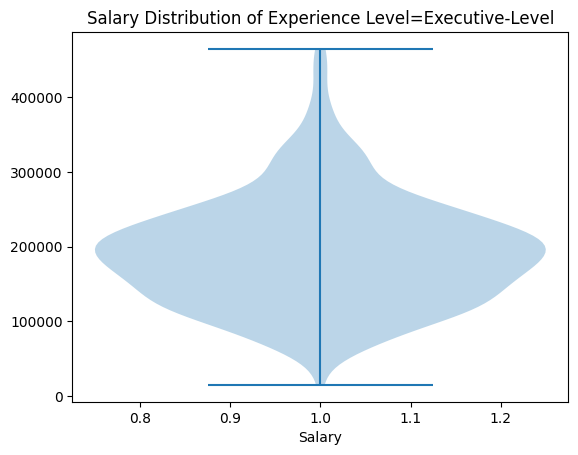

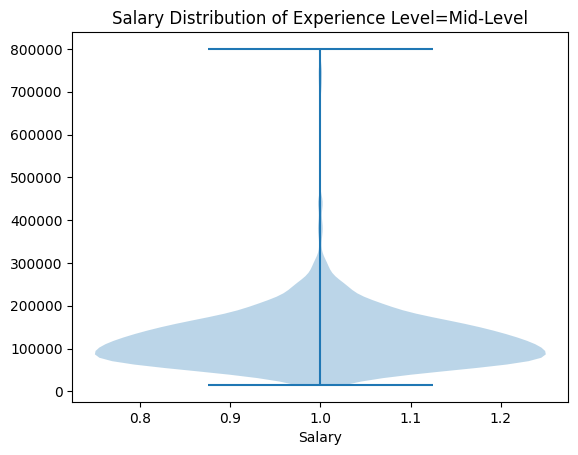

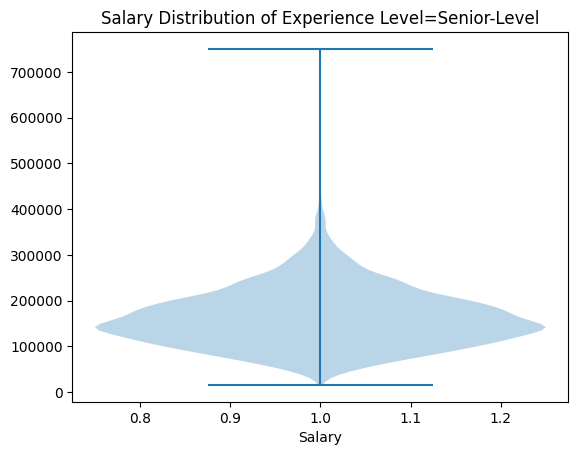

In [60]:
do_violin_plots('Experience_Level')

#### Quantile Plot

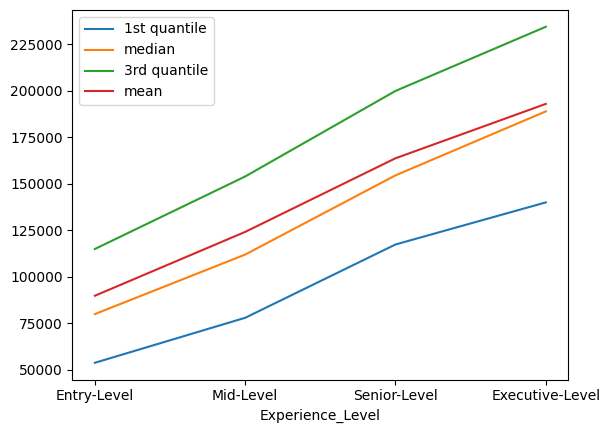

In [110]:
do_quantile_plot('Experience_Level', np.array(['Entry-Level',
                                               'Mid-Level',
                                               'Senior-Level',
                                               'Executive-Level']))

### 10 Most Popular Job Titles

10 most popular job titles are listed below.

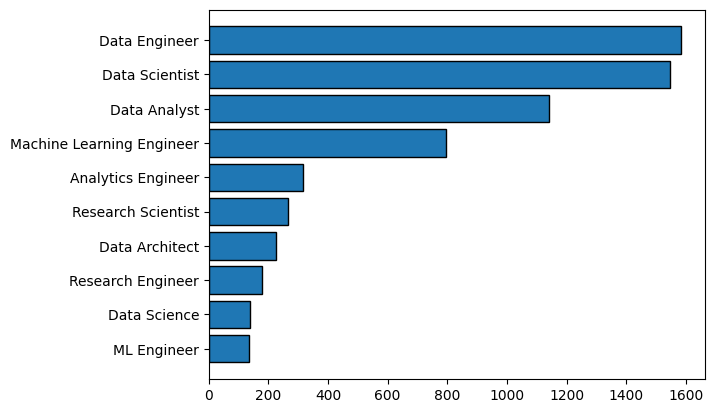

In [16]:
data = finalized_df['Job_Title'].value_counts().sort_values(ascending=False)[:10]
data = data[::-1]
plt.barh(data.index, data, edgecolor='black')
plt.show()

### Top 10 Highest Salaries
Top ten highest salaries and the entry corresponding to them are listed below.

In [17]:
finalized_df.sort_values(ascending=False, by='Salary_in_USD')[:10]

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size,Salary_in_USD
242,2024,Mid-Level,Full-Time,AI Architect,800000,USD,100,Medium,800000.0
1085,2024,Entry-Level,Full-Time,Data Analyst,774000,USD,0,Medium,774000.0
2060,2024,Mid-Level,Full-Time,Machine Learning Scientist,750000,USD,0,Medium,750000.0
2471,2024,Senior-Level,Full-Time,Data Analyst,750000,USD,0,Medium,750000.0
4828,2023,Mid-Level,Full-Time,Data Engineer,750000,USD,0,Medium,750000.0
3850,2023,Mid-Level,Full-Time,Machine Learning Engineer,750000,USD,0,Medium,750000.0
1884,2024,Senior-Level,Full-Time,Analytics Engineer,750000,USD,0,Medium,750000.0
4936,2023,Senior-Level,Full-Time,Data Scientist,750000,USD,0,Medium,750000.0
3844,2023,Mid-Level,Full-Time,Machine Learning Scientist,750000,USD,0,Medium,750000.0
3276,2024,Mid-Level,Full-Time,Research Engineer,720000,USD,0,Medium,720000.0


### Comparing Different Work Years 

#### Histograms

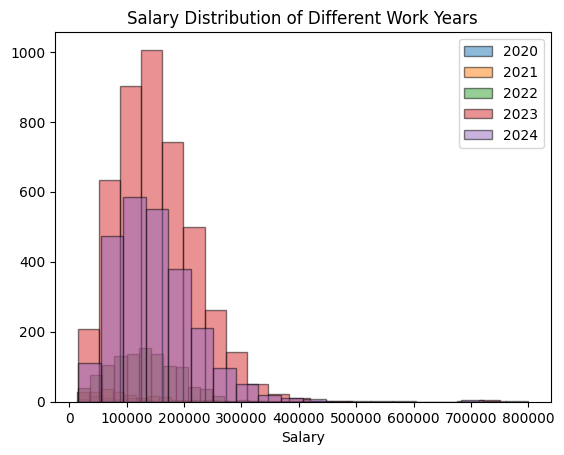

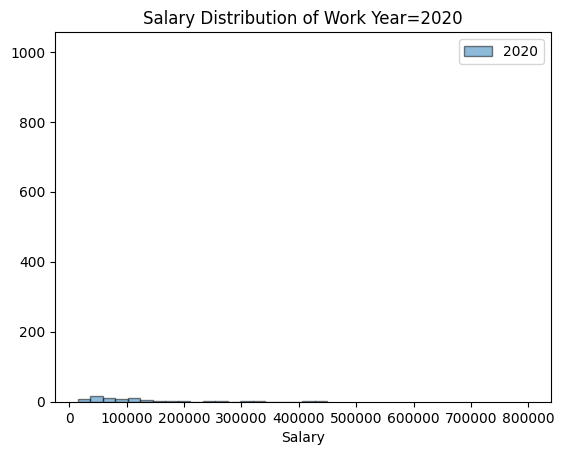

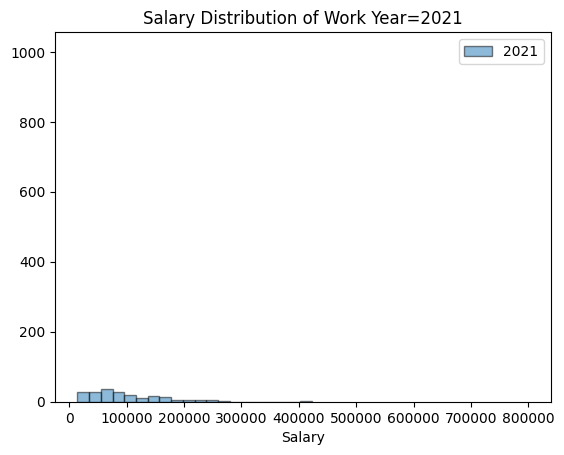

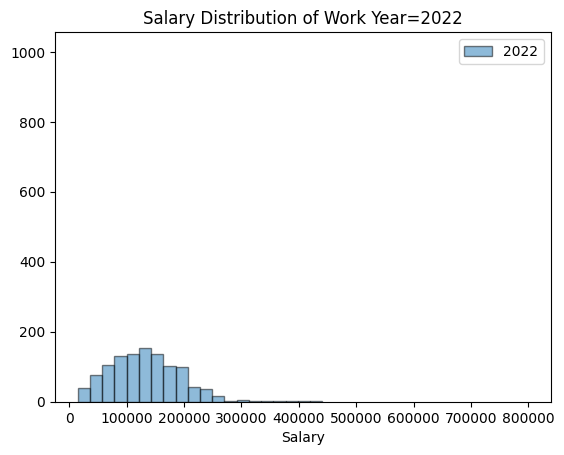

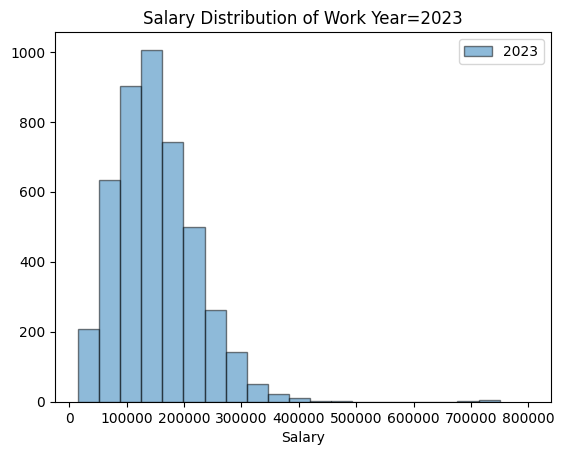

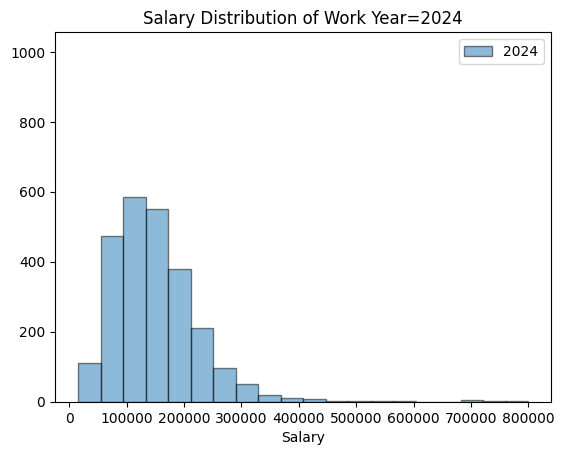

In [61]:
do_histograms('Work_Year')

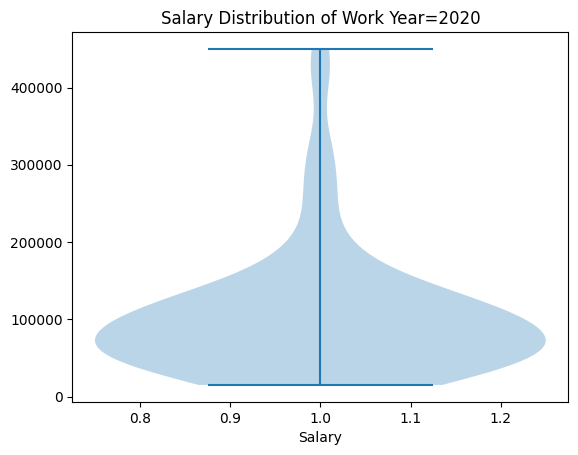

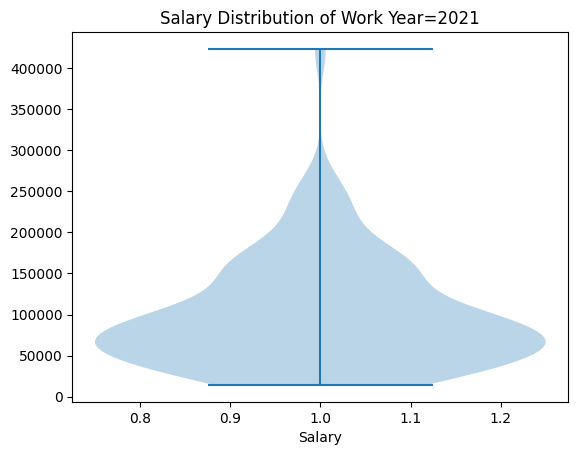

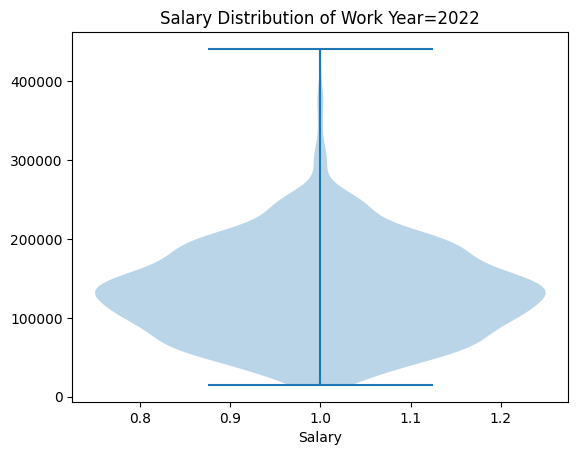

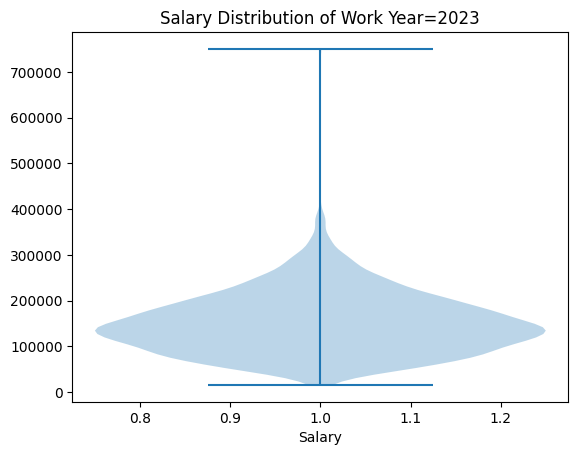

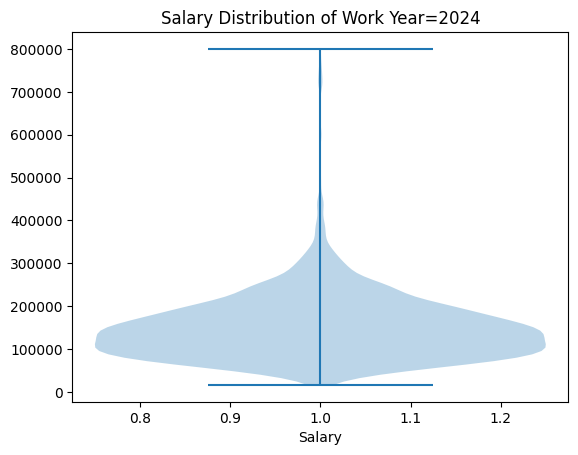

In [63]:
do_violin_plots('Work_Year')

#### Quantile Plot

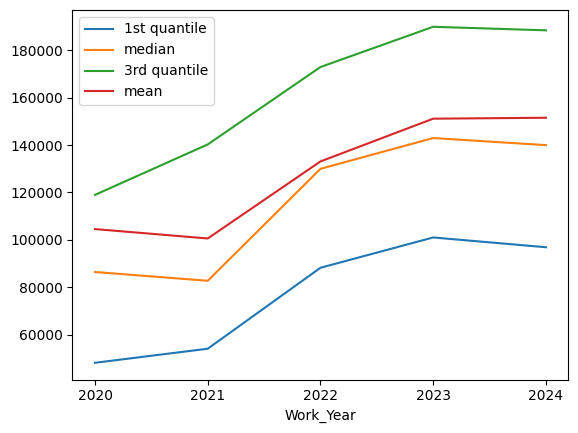

In [95]:
do_quantile_plot('Work_Year')

### Employment Type

#### Histograms

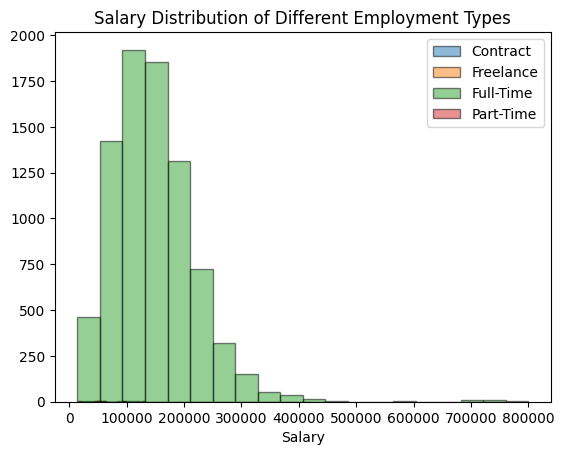

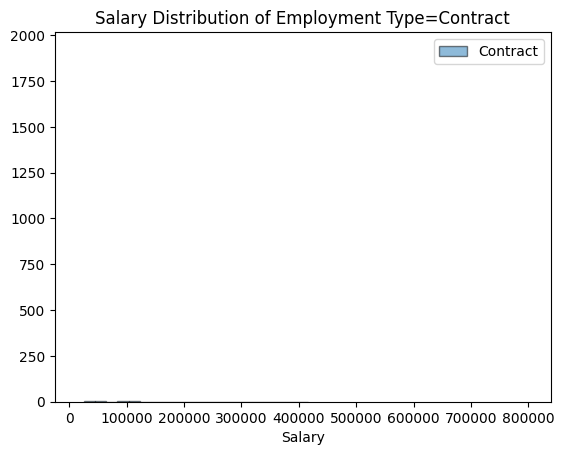

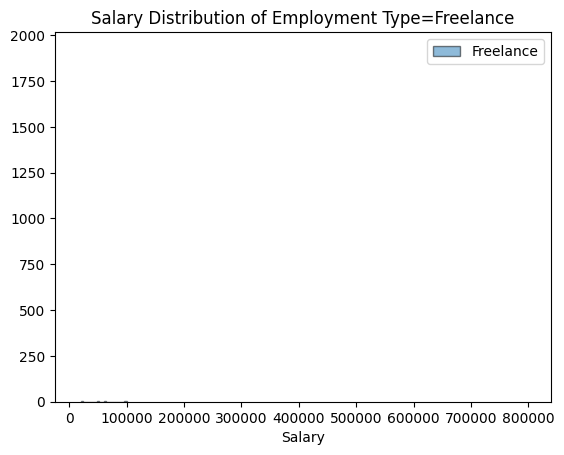

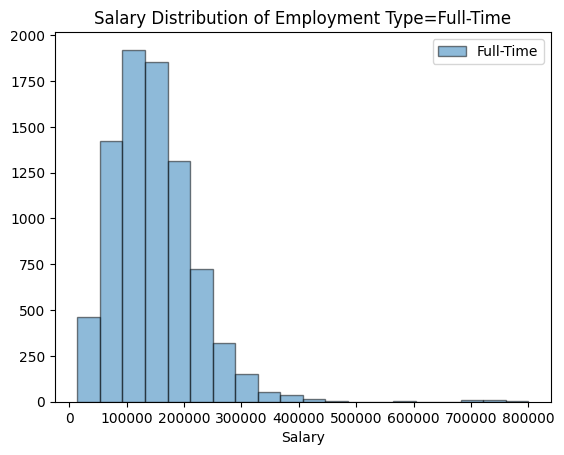

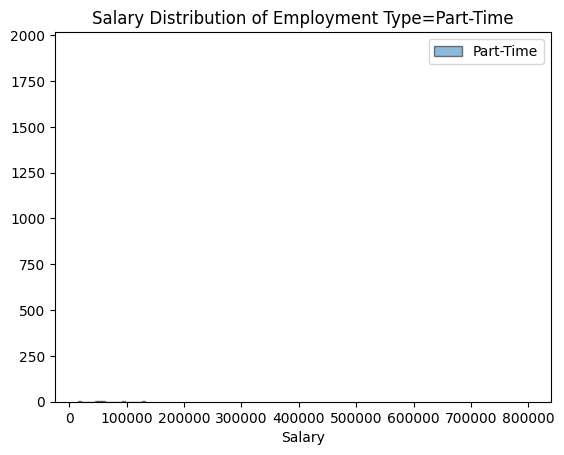

In [97]:
do_histograms('Employment_Type')

#### Violin Plots

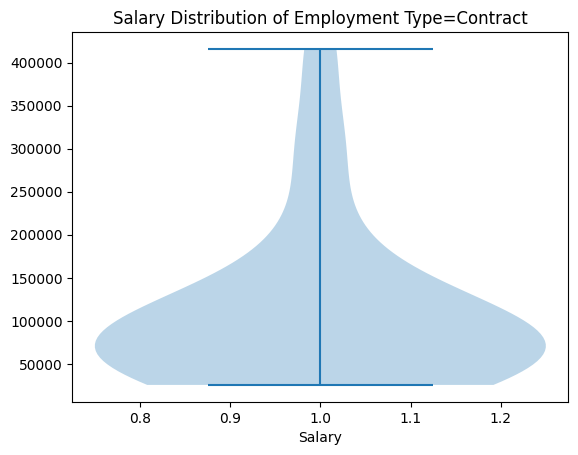

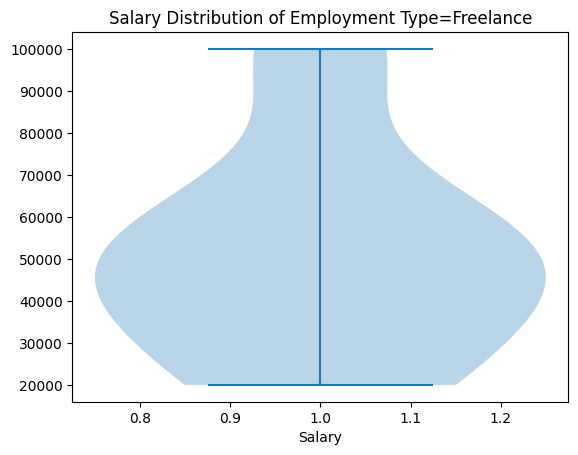

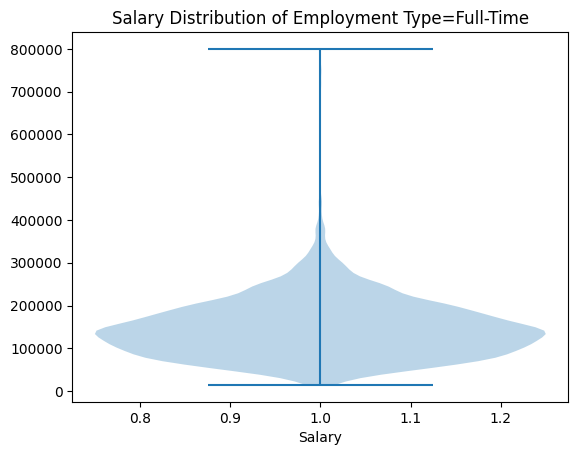

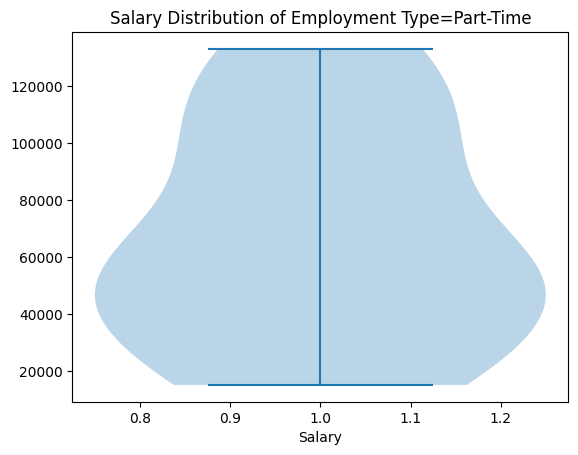

In [98]:
do_violin_plots('Employment_Type')

#### Quantile Plot

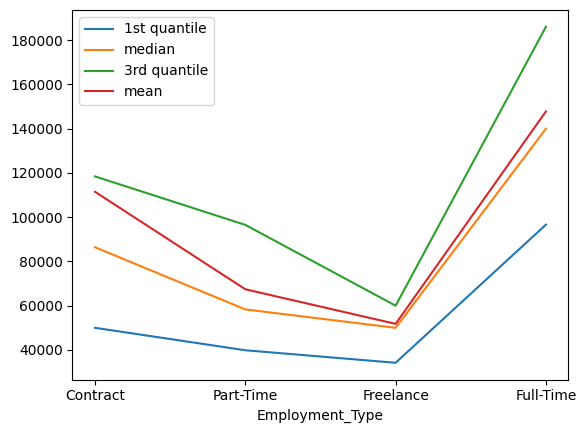

In [108]:
do_quantile_plot('Employment_Type', np.array(['Contract', 'Part-Time', 'Freelance', 'Full-Time']))

### Company Size

#### Histograms

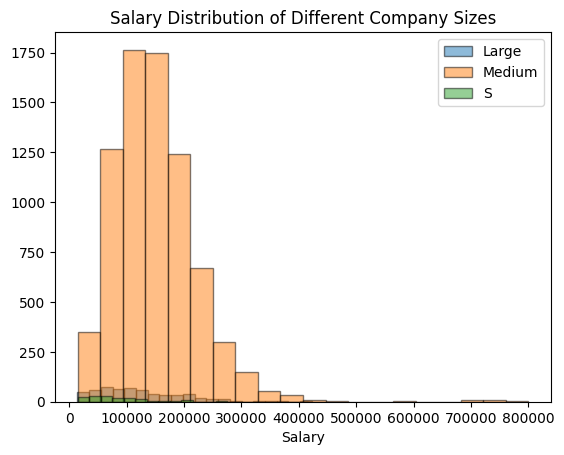

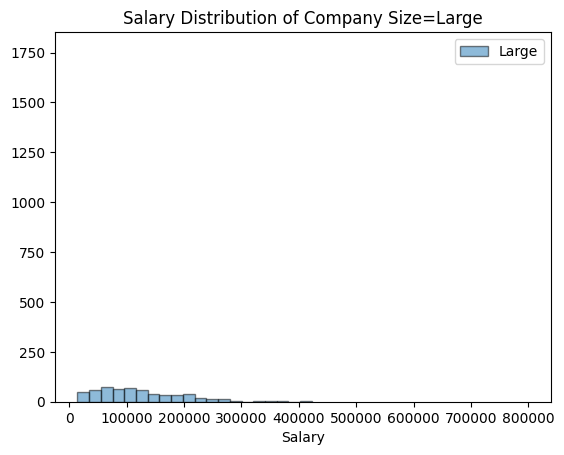

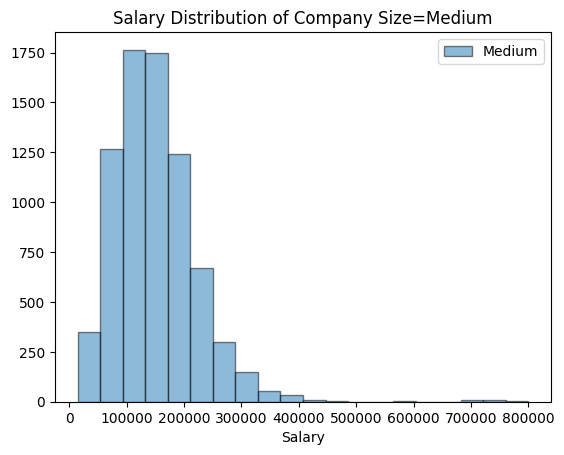

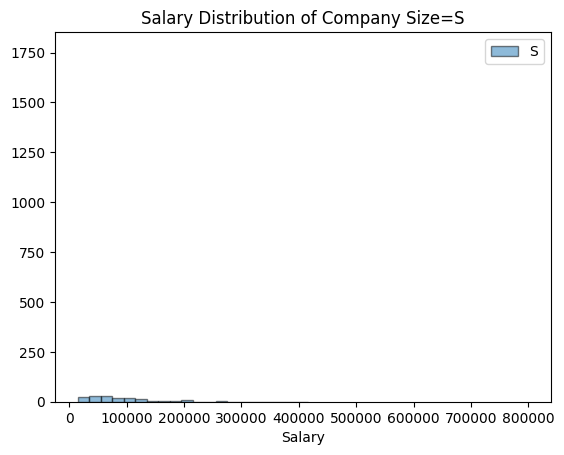

In [99]:
do_histograms('Company_Size')

#### Violin Plots

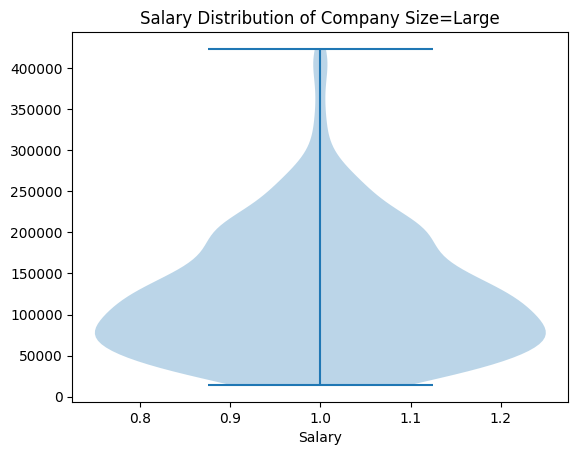

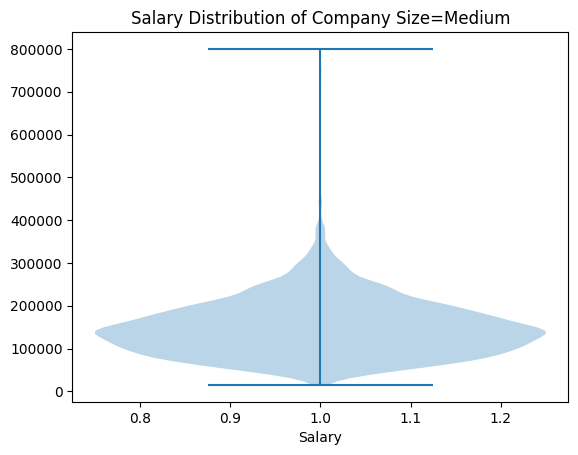

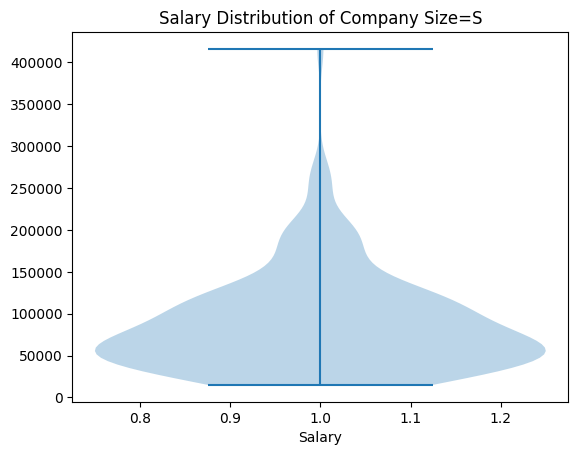

In [100]:
do_violin_plots('Company_Size')

#### Quantile Plot

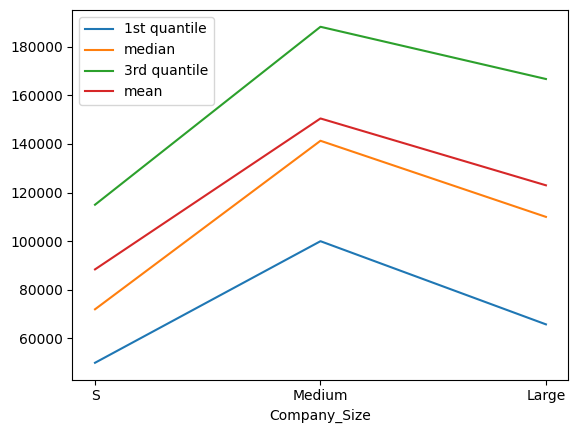

In [106]:
do_quantile_plot('Company_Size', np.array(['S', 'Medium', 'Large']))